## Generate Dataset from [TRDG DATASET](https://github.com/Belval/TextRecognitionDataGenerator)

Terdapat di [Notebook ini](https://colab.research.google.com/drive/1ZSg5v67oIs2zEge_btw4ba6IhqugQAI3?usp=sharing)

## Preprocess Image

In [ ]:
import glob
import os

In [ ]:
imagemap = []
imgname = []
for sub_dir_path in glob.glob("/content/drive/MyDrive/out"+"*"):
    #if os.path.isdir(sub_path_dir):
    try:
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + '/' + filename
            imgname.append(filename)
            imagemap.append(image_path)
            imagemap.sort()
    except Exception as e:
        print(e)

In [ ]:
imgname.sort()

In [ ]:
len(imagemap)

10000

In [ ]:
imagemap

['/content/drive/MyDrive/out/A. thermosiphon duperies nonregistration nondefamatory_5282.jpg',
 '/content/drive/MyDrive/out/A.L. oxacillin collyria dialin intercomparison_8287.jpg',
 '/content/drive/MyDrive/out/ACCT snake-wood moldery pectinic psoric_4443.jpg',
 '/content/drive/MyDrive/out/ADSP paragraphical liquefied Un-florentine endorphin_434.jpg',
 '/content/drive/MyDrive/out/AFACTS Greenstein spring-wood cyanomethaemoglobin Furnerius_5835.jpg',
 "/content/drive/MyDrive/out/ARIS sumpt Keelby initiator's Mindoro_3759.jpg",
 '/content/drive/MyDrive/out/ASDSP Raynell Psychopompus ten-league predismiss_3088.jpg',
 '/content/drive/MyDrive/out/ASIO free-working brownish-red Wahabi tylion_9844.jpg',
 '/content/drive/MyDrive/out/ATM tescaria Ipava twice-alarmed unbars_1376.jpg',
 '/content/drive/MyDrive/out/Aaqbiye beastliest elderly metacyclic unbottle_8772.jpg',
 '/content/drive/MyDrive/out/Aaronson milksop matranee ringlet perspicil_3623.jpg',
 '/content/drive/MyDrive/out/Aaronson octor

In [ ]:
imgname

['A. thermosiphon duperies nonregistration nondefamatory_5282.jpg',
 'A.L. oxacillin collyria dialin intercomparison_8287.jpg',
 'ACCT snake-wood moldery pectinic psoric_4443.jpg',
 'ADSP paragraphical liquefied Un-florentine endorphin_434.jpg',
 'AFACTS Greenstein spring-wood cyanomethaemoglobin Furnerius_5835.jpg',
 "ARIS sumpt Keelby initiator's Mindoro_3759.jpg",
 'ASDSP Raynell Psychopompus ten-league predismiss_3088.jpg',
 'ASIO free-working brownish-red Wahabi tylion_9844.jpg',
 'ATM tescaria Ipava twice-alarmed unbars_1376.jpg',
 'Aaqbiye beastliest elderly metacyclic unbottle_8772.jpg',
 'Aaronson milksop matranee ringlet perspicil_3623.jpg',
 'Aaronson octoroons neotypes mop-up blackcurrant_9690.jpg',
 'Abbi Yokkaichi strifemaker chatoyant fertileness_675.jpg',
 "Abelia high-sided decoyer nonignitability umpire's_6130.jpg",
 'Abencerrages charnu xenogenetic Prostigmin Ashelman_3798.jpg',
 'Abey gluttonously rib-grated rathole dreadingly_5580.jpg',
 'Abroms glutter striplight 

In [ ]:
import cv2
from PIL import Image
import numpy as np
import csv
import matplotlib.pyplot as plt
import string

In [ ]:
imgdata= []
for image in imagemap:
  image = cv2.imread(image)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (1280,32))
  image = np.asarray(image)
  image =  np.stack((image,)*3, axis=-1)
  imgdata.append(image)

In [ ]:
imgdata[0].shape

(32, 1280, 3)

In [ ]:
len(imgdata)

10000

In [ ]:
textlabel = []
with open("/content/newdata.csv", "r") as f:
  reader = csv.DictReader(f, delimiter=',')
  for line in reader:
    textlabel.append(line['label'])

In [ ]:
textlabel

['A. thermosiphon duperies nonregistration nondefamatory',
 'A.L. oxacillin collyria dialin intercomparison',
 'ACCT snake-wood moldery pectinic psoric',
 'ADSP paragraphical liquefied Un-florentine endorphin',
 'AFACTS Greenstein spring-wood cyanomethaemoglobin Furnerius',
 "ARIS sumpt Keelby initiator's Mindoro",
 'ASDSP Raynell Psychopompus ten-league predismiss',
 'ASIO free-working brownish-red Wahabi tylion',
 'ATM tescaria Ipava twice-alarmed unbars',
 'Aaqbiye beastliest elderly metacyclic unbottle',
 'Aaronson milksop matranee ringlet perspicil',
 'Aaronson octoroons neotypes mop-up blackcurrant',
 'Abbi Yokkaichi strifemaker chatoyant fertileness',
 "Abelia high-sided decoyer nonignitability umpire's",
 'Abencerrages charnu xenogenetic Prostigmin Ashelman',
 'Abey gluttonously rib-grated rathole dreadingly',
 'Abroms glutter striplight pseudogentlemanly beginnings',
 'Acephalina prioresses professorlike stenochoria time-server',
 'Achinese polystyle nonreadableness Canadianiz

In [ ]:
#imagedata = np.asarray(imgdata, dtype="float32")
imagedata = np.asarray(imgdata)
print(f"No of Images loaded :{imagedata.shape[0]}")
total_image = imagedata.shape[0]


No of Images loaded :10000


In [ ]:
imagedata.shape

(10000, 32, 1280, 3)

In [ ]:
imagedata[0].shape

(32, 1280, 3)

In [ ]:
#imagedata /= 255.0

Text(0.5, 1.0, 'ACCT snake-wood moldery pectinic psoric')

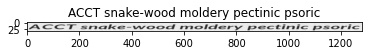

In [ ]:
idx = 2
plt.imshow(imagedata[idx])
plt.title(textlabel[idx])

In [ ]:
max(textlabel)

'zymotechnics nonrecipience windles postretinal queasinesses'

In [ ]:
mostlength = max(textlabel)
len(mostlength)

59

In [ ]:
target_simbol = f" {string.ascii_letters}{string.digits}.,*&!@~():`^]';|-"
total_simbol = len(target_simbol)
char_max = 80
target_size = (total_image, char_max, total_simbol)
#y = np.zeros(shape=target_size, dtype="float32")
y = np.zeros(shape=target_size)
print("{}".format(target_simbol))

 abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,*&!@~():`^]';|-


In [ ]:
for id_label, words in enumerate(textlabel):
  for id_word, word in enumerate(words):
    y[id_label][id_word][target_simbol.index(word)]=1

In [ ]:
y.dtype

dtype('float32')

In [ ]:
y.shape

(10000, 80, 80)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(imgdata, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.utils import shuffle
x, y, imgname, textlabel = shuffle(imagedata, y, imgname, textlabel, random_state=42)

Text(0.5, 1.0, "abridgment virus's butadiyne Photina cessation")

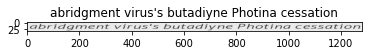

In [ ]:
idx = 2
plt.imshow(x[idx])
plt.title(textlabel[idx])

In [ ]:
#X_train.shape

In [ ]:
#Y_train.shape

In [ ]:
index = np.where(y[0][0] == 1)[0][0]
print(index)
print(textlabel[0])
print(target_simbol[index])

15
off-line untrustworthily holloo McConaghy votary
o


In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#aug = ImageDataGenerator(
	#rotation_range=10,
	#zoom_range=0.05,
	#width_shift_range=0.1,
	#height_shift_range=0.1,
	#shear_range=0.15,
	#horizontal_flip=False,
	#fill_mode="nearest")

## RNN LSTM 1

In [ ]:
import math

In [ ]:
FV = int(64 / math.pow(2, 5))

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Model

In [ ]:
input_data = Input(shape=(32, 1280, 3))

convolution1 = Conv2D(16, kernel_size=(3,3), activation='relu', padding='same')(input_data)
convolution1 = BatchNormalization(axis = -1)(convolution1)

pooling1 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution1)

convolution3 = Conv2D(32, kernel_size=(3,3),activation='relu',padding='same')(pooling1)
convolution3 = BatchNormalization(axis = -1)(convolution3)

convolution4 = Conv2D(32, kernel_size=(3,3),activation='relu',padding='same')(convolution3)
convolution4 = BatchNormalization(axis = -1)(convolution4)

pooling2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution4)

convolution5 = Conv2D(64, kernel_size=(3,3),activation='relu',padding='same')(pooling2)
convolution5 = BatchNormalization(axis = -1)(convolution5)

pooling3 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution5)

convolution8 = Conv2D(128, kernel_size=(3,3),activation='relu',padding='same')(pooling3)
convolution8 = BatchNormalization(axis = -1)(convolution8)

convolution9 = Conv2D(128, kernel_size=(3,3),activation='relu',padding='same')(convolution8)
convolution9 = BatchNormalization(axis = -1)(convolution9)

pooling4 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution9)

convolution11 = Conv2D(256, kernel_size=(3,3), activation='relu',padding='same')(pooling4)
convolution11= BatchNormalization(axis = -1)(convolution11)

pooling5 = MaxPooling2D(pool_size=(2,1), strides=(2,1))(convolution11)

squeezed = Lambda(lambda x: K.squeeze(x, 1))(pooling5)

bidir_LSTM1 = Bidirectional(LSTM(256, return_sequences=True, dropout=0.2))(squeezed)
bidir_LSTM2 = Bidirectional(LSTM(256, return_sequences=True, dropout=0.2))(bidir_LSTM1)
#y_pred = Bidirectional(LSTM(units = NUnits))(bidir_LSTM2)
exd     = tf.expand_dims(bidir_LSTM2,axis=2)
mapping = Conv2D(len(target_simbol),(2,2), activation='relu',padding='same')(exd)
mapping = tf.squeeze(mapping,axis=2)
mapping = Activation("softmax")(mapping)

ocr_rnn = Model(input_data, mapping)

In [ ]:
ocr_rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 1280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 32, 1280, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 32, 1280, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 640, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 640, 32)       4640      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 640, 32)      128   

In [ ]:
ocr_rnn.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
BS = 64
EPOCHS = 50

In [ ]:
#x,y = aug.flow(x,y)

In [ ]:
hist= ocr_rnn.fit(x,y, 
                  validation_split=0.25, 
                  epochs = EPOCHS, 
                  verbose=1)

Epoch 1/50
235/235 [==============================] - 40s 92ms/step - loss: 2.0597 - accuracy: 0.3324 - val_loss: 2.0468 - val_accuracy: 0.1032
Epoch 2/50
235/235 [==============================] - 19s 81ms/step - loss: 1.9332 - accuracy: 0.3978 - val_loss: 1.8559 - val_accuracy: 0.4242
Epoch 3/50
235/235 [==============================] - 21s 89ms/step - loss: 1.6212 - accuracy: 0.4651 - val_loss: 1.7121 - val_accuracy: 0.3963
Epoch 4/50
235/235 [==============================] - 20s 83ms/step - loss: 1.3411 - accuracy: 0.5200 - val_loss: 1.3799 - val_accuracy: 0.4743
Epoch 5/50
235/235 [==============================] - 20s 84ms/step - loss: 1.1560 - accuracy: 0.5564 - val_loss: 1.1043 - val_accuracy: 0.5695
Epoch 6/50
235/235 [==============================] - 20s 85ms/step - loss: 1.0247 - accuracy: 0.5881 - val_loss: 1.2193 - val_accuracy: 0.5754
Epoch 7/50
235/235 [==============================] - 20s 84ms/step - loss: 0.9251 - accuracy: 0.6136 - val_loss: 0.9952 - val_accuracy:

In [ ]:
import pandas as pd
hist_df = pd.DataFrame(hist.history) 
hist_csv_file = 'history_ocr_rnn_baru.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
ocr_rnn.save('/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocr_rnn_baru_adam.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
ocr_rnn = load_model('/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocr_rnn_baru_adam.hdf5')

In [ ]:
res = ocr_rnn.evaluate(x,y)
print('________________________')
print('Loss:       |   {:.2f}  |'.format(res[1]*100))
print('Accuracy: |   {:.2f}  |'.format(res[2]*100))

313/313 [==============================] - 402s 1s/step - loss: 0.2296 - accuracy: 0.9197
________________________
Loss:       |   91.97  |


IndexError: ignored

In [ ]:
print('________________________')
print('loss:       |   {:.2f}  |'.format(res[0]*100))
print('accuracy: |   {:.2f}  |'.format(res[1]*100))

________________________
loss:       |   22.96  |
accuracy: |   91.97  |


In [ ]:
pred = ocr_rnn.predict(x)

predicted result: hippogryph explicandu eencyy oeen-ooffed ouiess

original text: hippogryph explicandum ency. open-roofed louies


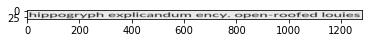

In [ ]:
idx= 1
output = ""
for charpred in range(len(pred[1])):
  i = np.argmax(pred[idx][charpred])
  output_label = target_simbol[i]
  output += output_label

print("predicted result:",output.strip())
print("\noriginal text:",textlabel[idx])
plt.imshow(x[idx][:,:,:3])

## RNN LSTM 2

In [ ]:
input_data = Input(shape=(32, 1280, 3))

convolution1 = Conv2D(16, kernel_size=(3,3), activation='relu', padding='same')(input_data)
convolution1 = BatchNormalization(axis = -1)(convolution1)

pooling1 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution1)

convolution3 = Conv2D(32, kernel_size=(3,3),activation='relu',padding='same')(pooling1)
convolution3 = BatchNormalization(axis = -1)(convolution3)

pooling2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution3)

convolution5 = Conv2D(64, kernel_size=(3,3),activation='relu',padding='same')(pooling2)
convolution5 = BatchNormalization(axis = -1)(convolution5)

pooling3 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution5)

convolution8 = Conv2D(128, kernel_size=(3,3),activation='relu',padding='same')(pooling3)
convolution8 = BatchNormalization(axis = -1)(convolution8)

convolution9 = Conv2D(128, kernel_size=(3,3),activation='relu',padding='same')(convolution8)
convolution9 = BatchNormalization(axis = -1)(convolution9)

pooling4 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution9)

convolution11 = Conv2D(256, kernel_size=(3,3), activation='relu',padding='same')(pooling4)
convolution11= BatchNormalization(axis = -1)(convolution11)

pooling5 = MaxPooling2D(pool_size=(2,1), strides=(2,1))(convolution11)

squeezed = Lambda(lambda x: K.squeeze(x, 1))(pooling5)

bidir_LSTM1 = Bidirectional(LSTM(256, return_sequences=True, dropout=0.2))(squeezed)
bidir_LSTM2 = Bidirectional(LSTM(256, return_sequences=True, dropout=0.2))(bidir_LSTM1)
#y_pred = Bidirectional(LSTM(units = NUnits))(bidir_LSTM2)
exd     = tf.expand_dims(bidir_LSTM2,axis=2)
mapping = Conv2D(len(target_simbol),(2,2), activation='relu',padding='same')(exd)
mapping = tf.squeeze(mapping,axis=2)
mapping = Activation("softmax")(mapping)

ocr_rnn2 = Model(input_data, mapping)

In [ ]:
ocr_rnn2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
hist2 = ocr_rnn2.fit(x,y, 
                  validation_split=0.25, 
                  epochs = EPOCHS, 
                  verbose=1)

Epoch 1/50
235/235 [==============================] - 25s 79ms/step - loss: 2.0588 - accuracy: 0.3364 - val_loss: 2.0089 - val_accuracy: 0.2326
Epoch 2/50
235/235 [==============================] - 17s 72ms/step - loss: 1.9770 - accuracy: 0.3857 - val_loss: 1.9456 - val_accuracy: 0.3520
Epoch 3/50
235/235 [==============================] - 17s 72ms/step - loss: 1.7440 - accuracy: 0.4473 - val_loss: 1.6497 - val_accuracy: 0.5139
Epoch 4/50
235/235 [==============================] - 17s 74ms/step - loss: 1.4470 - accuracy: 0.5038 - val_loss: 1.4026 - val_accuracy: 0.5052
Epoch 5/50
235/235 [==============================] - 17s 73ms/step - loss: 1.2099 - accuracy: 0.5487 - val_loss: 1.2654 - val_accuracy: 0.5596
Epoch 6/50
235/235 [==============================] - 17s 74ms/step - loss: 1.0647 - accuracy: 0.5793 - val_loss: 1.3079 - val_accuracy: 0.5273
Epoch 7/50
235/235 [==============================] - 17s 73ms/step - loss: 0.9607 - accuracy: 0.6114 - val_loss: 0.9790 - val_accuracy:

In [ ]:
ocr_rnn2.save('/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocrrnn2_baru_adam.hdf5')

In [ ]:
import pandas as pd
hist_df = pd.DataFrame(hist2.history) 
hist_csv_file = 'history_ocr_rnn2_baru.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
from tensorflow.keras.models import load_model
ocr_rnn2 = load_model('/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocrrnn2_baru_adam.hdf5')

In [ ]:
res2 = ocr_rnn2.evaluate(x,y)
print('________________________')
print('Loss:       |   {:.2f}  |'.format(res2[0]*100))
print('Accuracy: |   {:.2f}  |'.format(res2[1]*100))

313/313 [==============================] - 355s 1s/step - loss: 0.4059 - accuracy: 0.8744
________________________
Loss:       |   40.59  |
Accuracy: |   87.44  |


In [ ]:
pred2 = ocr_rnn2.predict(x)

predicted result: hippogryph explicandum enncyy ppenroooedd luieess

original text: hippogryph explicandum ency. open-roofed louies


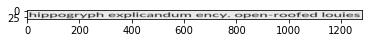

In [ ]:
idx= 1
output = ""
for charpred in range(len(pred2[1])):
  i = np.argmax(pred2[idx][charpred])
  output_label = target_simbol[i]
  output += output_label

print("predicted result:",output.strip())
print("\noriginal text:",textlabel[idx])
plt.imshow(x[idx][:,:,:3])

## ResNet LSTM

In [ ]:
def residual_module(data, filtersize, stride, spa=False):
  shortcut = data

  batch_norm_1 = BatchNormalization(axis=-1)(data)
  activ1 = Activation("relu")(batch_norm_1)
  conv_1 = Conv2D(int(filtersize*0.25), (1,1))(activ1)

  batch_norm_2 = BatchNormalization(axis=-1)(conv_1)
  activ2 = Activation("relu")(batch_norm_2)
  conv_2 = Conv2D(int(filtersize*0.25), (3,3), strides=stride, padding="same")(activ2)

  batch_norm_3 = BatchNormalization(axis=-1)(conv_2)
  activ3 = Activation("relu")(batch_norm_3)
  conv_3 = Conv2D(filtersize, (1,1))(activ3)

  if spa:
    shortcut = Conv2D(filtersize, (1,1), strides=stride)(activ1)
  x = add([conv_3, shortcut])
  return x

In [ ]:
def ocr_resnet():
  filters = [64,64,128,256,512]
  length = [3,3,3,3]
  inputs = Input(shape=(32, 1280, 3))
  x = BatchNormalization(axis=-1)(inputs)

  for s in range(0,4):
    if s == 0:
      stride = (1,1)
    else:
      stride = (2,2)
    x = residual_module(x, filters[s+1], stride, spa=True)
    for k in range(0, length[s]-1):
      x = residual_module(x, filters[s+1], (1,1))
  
  x = BatchNormalization(axis=-1)(x)
  x = Activation("relu")(x)
  x = AveragePooling2D((4,2))(x)
  squeezed = tf.squeeze(x, axis=1)
  rn1   = Bidirectional(LSTM(256,return_sequences=True))(squeezed)
  rn2   = Bidirectional(LSTM(256,return_sequences=True))(rn1)
  exd     = tf.expand_dims(rn2,axis=2)
  mapping = Conv2D(80,(2,2), activation='relu',padding='same')(exd)
  mapping = tf.squeeze(mapping,axis=2)
  mapping = Activation("softmax")(mapping)
  mod = Model(inputs, mapping)
  return mod

In [ ]:
ocrmodel = ocr_resnet()
ocrmodel.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 1280, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization_101 (Batch  (None, 32, 1280, 3)  12         ['input_7[0][0]']                
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_102 (Batch  (None, 32, 1280, 3)  12         ['batch_normalization_101[0][0]']
 Normalization)                                                                             

In [ ]:
ocrmodel.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
hist3= ocrmodel.fit(x, y, validation_split = 0.25, epochs = EPOCHS, verbose=1)

Epoch 1/50
235/235 [==============================] - 186s 743ms/step - loss: 2.2911 - accuracy: 0.2998 - val_loss: 2.8181 - val_accuracy: 0.0056
Epoch 2/50
235/235 [==============================] - 172s 732ms/step - loss: 2.2569 - accuracy: 0.3579 - val_loss: 2.8248 - val_accuracy: 0.0052
Epoch 3/50
235/235 [==============================] - 172s 732ms/step - loss: 2.1569 - accuracy: 0.3783 - val_loss: 2.2143 - val_accuracy: 0.2630
Epoch 4/50
235/235 [==============================] - 172s 733ms/step - loss: 2.0009 - accuracy: 0.4076 - val_loss: 2.1176 - val_accuracy: 0.4357
Epoch 5/50
235/235 [==============================] - 172s 732ms/step - loss: 1.7811 - accuracy: 0.4516 - val_loss: 1.7753 - val_accuracy: 0.4681
Epoch 6/50
235/235 [==============================] - 172s 732ms/step - loss: 1.5457 - accuracy: 0.4890 - val_loss: 1.8648 - val_accuracy: 0.4701
Epoch 7/50
235/235 [==============================] - 176s 750ms/step - loss: 1.3188 - accuracy: 0.5386 - val_loss: 1.2393 -

In [ ]:
ocrmodel.save('/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocr_resnet_baru_adam.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
ocrmodel = load_model('/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocr_resnet_baru_adam.hdf5')

In [ ]:
res3 = ocrmodel.evaluate(x,y)
print('________________________')
print('Loss:       |   {:.2f}  |'.format(res3[0]*100))
print('Accuracy: |   {:.2f}  |'.format(res3[1]*100))

313/313 [==============================] - 1914s 6s/step - loss: 0.2479 - accuracy: 0.9238
________________________
Loss:       |   24.79  |
Accuracy: |   92.38  |


In [ ]:
pred3 = ocrmodel.predict(x)

predicted result: hippogryph explicandum encyy  pen--ooded louiiss

original text: hippogryph explicandum ency. open-roofed louies


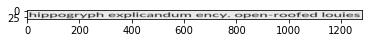

In [ ]:
idx= 1
output = ""
for charpred in range(len(pred3[1])):
  i = np.argmax(pred3[idx][charpred])
  output_label = target_simbol[i]
  output += output_label

print("predicted result:",output.strip())
print("\noriginal text:",textlabel[idx])
plt.imshow(x[idx][:,:,:3])

## ResNet

In [ ]:
def ocr_resnet():
  filters = [64,64,128,256,512]
  length = [3,3,3,3]
  inputs = Input(shape=(32, 1280, 3))
  x = BatchNormalization(axis=-1)(inputs)

  for s in range(0,4):
    if s == 0:
      stride = (1,1)
    else:
      stride = (2,2)
    x = residual_module(x, filters[s+1], stride, spa=True)
    for k in range(0, length[s]-1):
      x = residual_module(x, filters[s+1], (1,1))
  x = AveragePooling2D((4,2))(x)
  squeezed = tf.squeeze(x, axis=1)
  exd     = tf.expand_dims(squeezed,axis=2)
  mapping = Conv2D(80,(2,2), activation='relu',padding='same')(exd)
  mapping = tf.squeeze(mapping,axis=2)
  mapping = Activation("softmax")(mapping)
  mod = Model(inputs, mapping)
  return mod

In [ ]:
ocrresnet2 = ocr_resnet()
ocrresnet2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 1280, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 1280, 3)  12         ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 32, 1280, 3)  12         ['batch_normalization[0][0]']    
 rmalization)                                                                                 

In [ ]:
ocrresnet2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
hist3= ocrresnet2.fit(x, y, validation_split = 0.25, epochs = EPOCHS, verbose=1)

Epoch 1/50
235/235 [==============================] - 183s 704ms/step - loss: 2.3100 - accuracy: 0.1143 - val_loss: 2.2468 - val_accuracy: 0.0474
Epoch 2/50
235/235 [==============================] - 170s 725ms/step - loss: 2.2623 - accuracy: 0.1525 - val_loss: 2.2058 - val_accuracy: 0.0742
Epoch 3/50
235/235 [==============================] - 175s 744ms/step - loss: 2.2339 - accuracy: 0.1686 - val_loss: 2.1646 - val_accuracy: 0.1029
Epoch 4/50
235/235 [==============================] - 171s 728ms/step - loss: 2.2197 - accuracy: 0.1742 - val_loss: 2.1395 - val_accuracy: 0.0910
Epoch 5/50
235/235 [==============================] - 170s 725ms/step - loss: 2.2072 - accuracy: 0.1813 - val_loss: 2.2493 - val_accuracy: 0.1945
Epoch 6/50
235/235 [==============================] - 171s 726ms/step - loss: 2.1966 - accuracy: 0.1804 - val_loss: 2.2591 - val_accuracy: 0.1769
Epoch 7/50
235/235 [==============================] - 171s 727ms/step - loss: 2.1860 - accuracy: 0.1859 - val_loss: 2.2006 -

In [ ]:
ocrresnet2.save('/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocr_resnet2_baru_adam.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
ocrresnet2 = load_model('/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocr_resnet2_baru_adam.hdf5')

In [ ]:
res4 = ocrresnet2.evaluate(x,y)
print('________________________')
print('Loss:       |   {:.2f}  |'.format(res4[0]*100))
print('Accuracy: |   {:.2f}  |'.format(res4[1]*100))

313/313 [==============================] - 70s 188ms/step - loss: 1.7121 - accuracy: 0.5157
________________________
Loss:       |   171.21  |
Accuracy: |   51.57  |


## Convert Model RNN LSTM 1 ke Tensorflow.js

In [ ]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.6 MB/s 
     |████████████████████████████████| 40 kB 5.7 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!tensorflowjs_converter --input_format=keras {'/content/drive/MyDrive/OCR-with-tensorflow-and-opencv-main/ocr_rnn_baru_adam.hdf5'} ./